# **LOOQBOX CHALLENGE**

## INSTALAÇÃO E IMPORTS DE BIBLIOTECAS

In [ ]:
# INSTALAÇÃO
!pip install mysql-connector-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.5 MB 1.4 MB/s 


In [ ]:
# IMPORTS
import mysql.connector as mysql
from pandas import DataFrame
import pandas as pd
from datetime import datetime
from logging import raiseExceptions
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from pandas.api.types import is_categorical_dtype


## LOAD DE DADOS (FROM MYSQL)

In [ ]:
# CONECTOR MYSQL
myconn = mysql.connect(host='35.199.127.241',database='looqbox_challenge',user='looqbox-challenge',password='looq-challenge')
cursor = myconn.cursor()

# DATA PRODUCT LOAD:
cursor.execute("SELECT * FROM data_product")
df_data_product = DataFrame(cursor.fetchall())
column_names = []
for n in cursor.description:
  column_names.append(n[0])
df_data_product.columns = column_names

# DATA PRODUCT LOAD:
cursor.execute("SELECT * FROM data_product_sales")
df_data_product_sales = DataFrame(cursor.fetchall())
column_names = []
for n in cursor.description:
  column_names.append(n[0])
df_data_product_sales.columns = column_names

# DATA PRODUCT LOAD:
cursor.execute("SELECT * FROM data_store_cad")
df_data_store_cad = DataFrame(cursor.fetchall())
column_names = []
for n in cursor.description:
  column_names.append(n[0])
df_data_store_cad.columns = column_names

# DATA PRODUCT LOAD:
cursor.execute("SELECT * FROM data_store_sales")
df_data_store_sales = DataFrame(cursor.fetchall())
column_names = []
for n in cursor.description:
  column_names.append(n[0])
df_data_store_sales.columns = column_names


## VISUALIZAÇÃO DE DADOS (FROM MYSQL)

In [ ]:
df_data_product.head()
# data_product

,PRODUCT_COD,PRODUCT_NAME,PRODUCT_VAL,DEP_NAME,DEP_COD,SECTION_NAME,SECTION_COD
0,10,Acido Tranexamico 250mg Generico EMS 12 Compri...,36.71,MEDICAMENTOS GENÉRICOS,10,CIRCULAÇÃO,40
1,11,Bissulfato de Clopidogrel 75mg Generico Teuto ...,66.51,MEDICAMENTOS GENÉRICOS,10,CIRCULAÇÃO,40
2,12,Cloridrato de Amiodarona 200mg Generico Biosin...,31.17,MEDICAMENTOS GENÉRICOS,10,CIRCULAÇÃO,40
3,13,Acido Tranexâmico 250mg Generico Legrand 12 Co...,36.71,MEDICAMENTOS GENÉRICOS,10,CIRCULAÇÃO,40
4,14,Cloridrato Oximetazolina Adulto 5mg/ml Genéric...,12.08,MEDICAMENTOS GENÉRICOS,10,GRIPES E RESFRIADOS,41


In [ ]:
df_data_product_sales.head()
# data_product_sales

,STORE_CODE,PRODUCT_CODE,DATE,SALES_VALUE,SALES_QTY
0,1,18,2019-01-01,708.50,65
1,1,18,2019-01-02,1297.10,119
2,1,18,2019-01-03,1144.50,105
3,1,18,2019-01-04,1090.00,100
4,1,18,2019-01-05,893.80,82


In [ ]:
df_data_store_cad.head()
# data_store_cad

,STORE_CODE,STORE_NAME,START_DATE,END_DATE,BUSINESS_NAME,BUSINESS_CODE
0,1,Sao Paulo,2006-10-01,,Varejo,1
1,2,Chicago,2007-10-01,,Varejo,1
2,3,Roma,2008-10-01,,Varejo,1
3,4,Tokio,2009-10-01,,Varejo,1
4,5,Paris,2019-01-01,,Proximidade,2


In [ ]:
df_data_store_sales.head()
# data_store_sales

,STORE_CODE,DATE,SALES_VALUE,SALES_QTY
0,1,2014-11-23,111387.87,7227
1,10,2014-11-23,63256.35,4362
2,11,2014-11-23,62680.86,4257
3,12,2014-11-23,62680.86,4257
4,13,2014-11-23,111387.87,7227


##SQL TEST

###What are the 10 most expensive products in the company?





In [ ]:
query = """SELECT 
          product_code, PRODUCT_NAME,
          AVG(sales_value/sales_qty) as unit_value
          FROM data_product_sales
          data_product_sales LEFT JOIN data_product
          ON data_product_sales.product_code = data_product.product_cod
          GROUP BY product_code 
          ORDER BY unit_value DESC 
          limit 10"""

cursor.execute(query)
df = DataFrame(cursor.fetchall())

column_names = []
for n in cursor.description:
  column_names.append(n[0])
df.columns = column_names

df.head(10)


,product_code,PRODUCT_NAME,unit_value
0,2947,Vinho do Porto Valdouro Ruby Garrafa 750ml,72.9000000000
1,485,Limpador para Piso DESTAC Direto Madeira 750ml,70.0900000000
2,96287,Protetor Solar SUNDOWN Kids Color Tutti Fruti ...,52.9000000000
3,1023,Racao para Caes Adultos com Mais de 7 Anos DOG...,45.9000000000
4,3155,Alimento Nutritivo Sabor Banana SUSTAGEN Lata ...,44.8900000000
5,22101,Formula Infantil Nan Comfort 1 NESTLE Lata 800g,44.3900000000
6,241404,Protetor Solar SUNDOWN Spray Pele Molhada Fato...,39.7500000000
7,868,Racao para Caes Adultos de Racas Pequenas DOG ...,39.6500000000
8,707,Racao para Caes Adultos de Racas Medias e Gran...,39.6500000000
9,175754,Fralda PAMPERS Recem Nascido Pacote com 40 Uni...,38.7500000000


###What sections do the 'BEBIDAS' and 'PADARIA' departments have?


In [ ]:
query = """SELECT SECTION_NAME 
          FROM data_product 
          WHERE DEP_NAME = 'PADARIA' 
          OR DEP_NAME = 'BEBIDAS'
          GROUP BY SECTION_NAME 
           """

cursor.execute(query)
df = DataFrame(cursor.fetchall())

column_names = []
for n in cursor.description:
  column_names.append(n[0])
df.columns = column_names

df

,SECTION_NAME
0,BEBIDAS
1,CERVEJAS
2,DOCES-E-SOBREMESAS
3,GESTANTE
4,PADARIA
5,QUEIJOS-E-FRIOS
6,REFRESCOS
7,VINHOS


### What was the total sale of products (in $) of each Business Area in the first quarter of 2019?

In [ ]:
query = """SELECT BUSINESS_NAME, SUM(SALES_VALUE) AS VALOR_TOTAL_PRIMEIRO_QUARTER_2019
          FROM data_store_cad 
          LEFT JOIN data_store_sales 
          ON data_store_cad.store_code = data_store_sales.store_code
          WHERE DATE >= '2019-01-01'
          AND DATE <= '2019-04-01'
          GROUP BY BUSINESS_NAME"""

cursor.execute(query)
df = DataFrame(cursor.fetchall())

column_names = []
for n in cursor.description:
  column_names.append(n[0])
df.columns = column_names

df

,BUSINESS_NAME,VALOR_TOTAL_PRIMEIRO_QUARTER_2019
0,Atacado,81079295.20
1,Farma,82462460.37
2,Posto,32338509.96
3,Proximidade,80863761.30
4,Varejo,81733342.62


## CASES

### **1) The Dev Team was tired of developing the same old queries just varying the filters accordingly to their boss demands.**


As a new member of the crew, your mission now is to create a dynamic function in Python, on the most flexible of ways, to produce queries and retrieve a dataframe based on three parameters:

* product_code: integer
* store_code: integer
* date: list of ISO-like strings

Date e.g.

['2019-01-01', '2019-01-31']

It should look like this my_data = retrieve_data(product_code, store_code, date)

Make your team proud!

Extra instructions: Retrieve all columns from table data_product_sales.

In [ ]:
def retrieve_data(product_code, store_code, date):
  """
  Função de pesquisa dentro da tabela 'data_product_sales' 

  Retorna dados das colunas STORE_CODE, PRODUCT_CODE, DATE, SALES_VALUE e SALES_QTY caso o input contenha dados
  Caso contrário irá levantar Error

  O input é feito pelos argumentos (product_code, store_code, date), onde:
  ** product_code (int): PRODUCT CODE
  ** store_code (int): STORE CODE
  ** date (list): SALES DATE (Example: ['2019-01-01', '2019-01-05'])
  """

  try:
    # INPUT
    date_i = date[0]
    date_f = date[1]
    
    # CONECTOR MYSQL
    myconn = mysql.connect(host='35.199.127.241',database='looqbox_challenge',user='looqbox-challenge',password='looq-challenge')
    cursor = myconn.cursor()

    # DATA PRODUCT LOAD:
    cursor.execute(f"SELECT * FROM data_product_sales WHERE STORE_CODE = {store_code} AND PRODUCT_CODE = {product_code} AND DATE >= '{date_i}' AND DATE <= '{date_f}' ")
    df = DataFrame(cursor.fetchall())

    column_names = []
    for n in cursor.description:
      column_names.append(n[0])
    df.columns = column_names
    
    cursor.close()

    # DISPLAY DATAFRAME
    display(df)

  except ValueError:
    print("Input brought no results! Sorry!")
  except:
    print("An Unidentified Error has Occurred")


retrieve_data(18, 1, ['2019-01-01', '2019-01-05'])
help(retrieve_data)

,STORE_CODE,PRODUCT_CODE,DATE,SALES_VALUE,SALES_QTY
0,1,18,2019-01-01,708.50,65
1,1,18,2019-01-02,1297.10,119
2,1,18,2019-01-03,1144.50,105
3,1,18,2019-01-04,1090.00,100
4,1,18,2019-01-05,893.80,82


Help on function retrieve_data in module __main__:

retrieve_data(product_code, store_code, date)
    Função de pesquisa dentro da tabela 'data_product_sales' 
    
    Retorna dados das colunas STORE_CODE, PRODUCT_CODE, DATE, SALES_VALUE e SALES_QTY caso o input contenha dados
    Caso contrário irá levantar Error
    
    O input é feito pelos argumentos (product_code, store_code, date), onde:
    ** product_code (int): PRODUCT CODE
    ** store_code (int): STORE CODE
    ** date (list): SALES DATE (Example: ['2019-01-01', '2019-01-05'])



### **2) A brand new client sent you two ready-to-go queries. Those are listed below:**



*Query 1:*

```
# SELECT
      STORE_CODE,
     STORE_NAME,
      START_DATE,
      END_DATE,
      BUSINESS_NAME,
      BUSINESS_CODE
FROM data_store_cad
```

*Query 2:*

```
# SELECT
        STORE_CODE,
        DATE,
        SALES_VALUE,
        SALES_QTY
FROM data_store_sales
WHERE DATE BETWEEN '2019-01-01' AND '2019-12-31'

```

In addition, he gave you this set of instructions:

You must not modify my queries!

Please filter the period between this given range:

['2019-10-01','2019-12-31']

We are in need of this visualization (click here to see it)! Please, create it with Python

In [ ]:
from os import truncate
# DATA PRODUCT LOAD:
# DF1
cursor.execute("""SELECT
                  STORE_CODE,
                  STORE_NAME,
                  START_DATE,
                  END_DATE,
                  BUSINESS_NAME,
                  BUSINESS_CODE
                  FROM data_store_cad""")

df1 = DataFrame(cursor.fetchall())
column_names = []
for n in cursor.description:
  column_names.append(n[0])
df1.columns = column_names

# DF2
cursor.execute("""SELECT
                  STORE_CODE,
                  DATE,
                  SALES_VALUE,
                  SALES_QTY
                  FROM data_store_sales
                  WHERE DATE BETWEEN '2019-01-01' AND '2019-12-31'""")

df2 = DataFrame(cursor.fetchall())
column_names = []
for n in cursor.description:
  column_names.append(n[0])
df2.columns = column_names

# FILTERING DATA WITH PYTHON:
df2["DATE"] = pd.to_datetime(df2["DATE"])
df2 = df2[(df2['DATE'] >= '2019-10-01') & (df2['DATE'] <= '2019-12-31')]

# JOIN
df_join = pd.merge(df1, df2, on='STORE_CODE')


def agg(df):
  """Agrega colunas de um dataframe de acordo com o dicionário 'dict_agg' """
  dict_agg = {
      'VM': df.SALES_VALUE.sum(),
      'QNT': df.SALES_QTY.sum()
  }
  return pd.Series(dict_agg)

df_join_agg = df_join.groupby(['STORE_NAME', 'BUSINESS_NAME'], as_index=False).apply(agg)
df_join_agg['TM'] = round(df_join_agg['VM'] / df_join_agg['QNT'], 2)
df_join_agg = df_join_agg.drop(columns=['VM', 'QNT'])

display(df_join_agg)

,STORE_NAME,BUSINESS_NAME,TM
0,Bahia,Atacado,15.39
1,Bangkok,Posto,13.67
2,Belem,Proximidade,15.37
3,Berlin,Proximidade,15.39
4,Buenos Aires,Atacado,15.39
5,Chicago,Varejo,15.53
6,Dubai,Atacado,15.39
7,Hong Kong,Farma,26.35
8,London,Farma,28.99
9,Madri,Farma,29.03


### **3) Building your own visualization**


Create at least one chart using the table IMDB_movies. The code must be in Python, and you are free to use any libraries, data in the table and graphic format. Explain why you chose the visualization (or visualizations) you are submitting.

In [ ]:
# DATA PRODUCT LOAD:
cursor.execute("SELECT * FROM IMDB_movies")
df_imdb_i = DataFrame(cursor.fetchall())
column_names = []
for n in cursor.description:
  column_names.append(n[0])
df_imdb_i.columns = column_names

display(df_imdb_i)

,Id,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8,757074,333,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7,485820,126,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7,157606,138,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7,60545,270,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6,393727,325,40.0
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6,27585,None,45.0
996,997,Hostel: Part II,Horror,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,6,73152,18,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6,70699,58,50.0
998,999,Search Party,"Adventure,Comedy",Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,6,4881,None,22.0


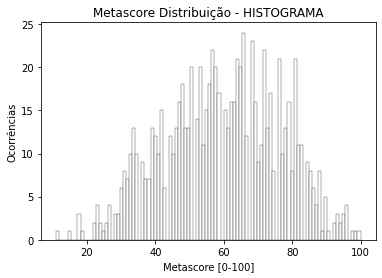

/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


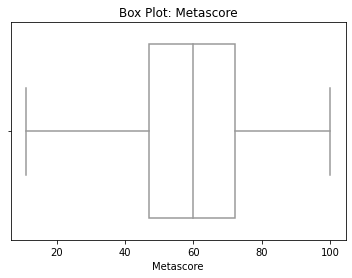

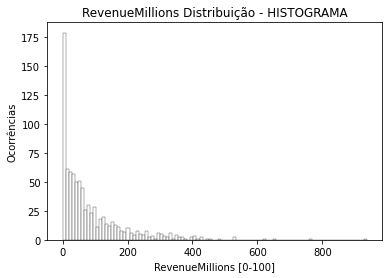

/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


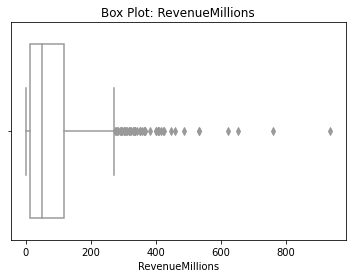

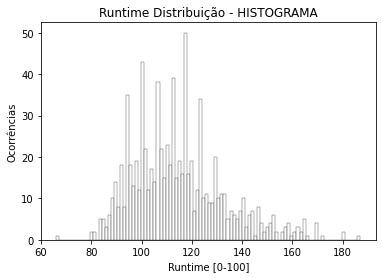

/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


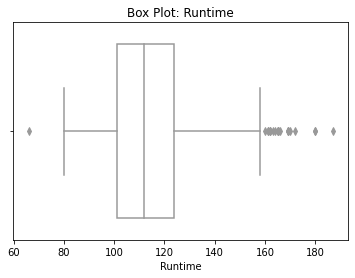

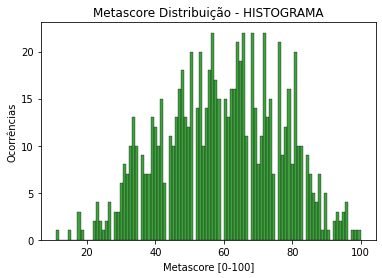

/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


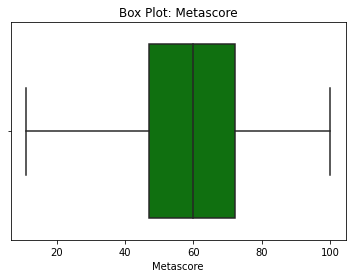

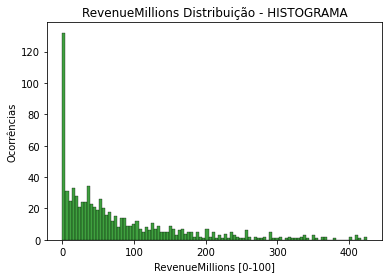

/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


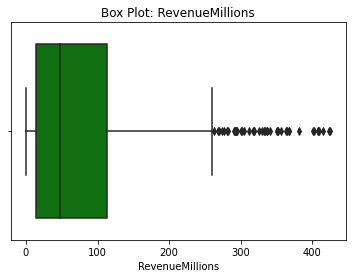

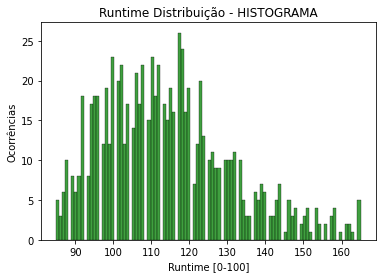

/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


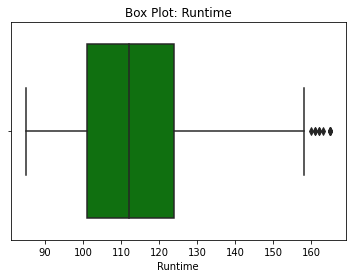

,Id,Title,Genre,Director,Actors,Year,Runtime,Rating,Votes,RevenueMillions,Metascore,MetascoreCluster,RevenueMillionsCluster,Metascore-level,Revenue-level
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8,757074,333,76.0,2,2,High-Metascore,High-Revenue
1,14,Moana,"Animation,Adventure,Comedy",Ron Clements,"Auli'i Cravalho, Dwayne Johnson, Rachel House,...",2016,107,8,118151,249,81.0,2,2,High-Metascore,High-Revenue
2,36,Captain America: Civil War,"Action,Adventure,Sci-Fi",Anthony Russo,"Chris Evans, Robert Downey Jr.,Scarlett Johans...",2016,147,8,411656,408,75.0,2,2,High-Metascore,High-Revenue
3,38,Doctor Strange,"Action,Adventure,Fantasy",Scott Derrickson,"Benedict Cumberbatch, Chiwetel Ejiofor, Rachel...",2016,115,8,293732,233,72.0,2,2,High-Metascore,High-Revenue
4,75,Zootopia,"Animation,Adventure,Comedy",Byron Howard,"Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016,108,8,296853,341,78.0,2,2,High-Metascore,High-Revenue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,992,Taare Zameen Par,"Drama,Family,Music",Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,9,102697,1,42.0,0,0,Low-Metascore,Low-Revenue
806,994,Resident Evil: Afterlife,"Action,Adventure,Horror",Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,6,140900,60,37.0,0,0,Low-Metascore,Low-Revenue
807,995,Project X,Comedy,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,7,164088,55,48.0,0,0,Low-Metascore,Low-Revenue
808,997,Hostel: Part II,Horror,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,6,73152,18,46.0,0,0,Low-Metascore,Low-Revenue


,High-Revenue,Mid-Revenue,Low-Revenue,High-Metascore,Mid-Metascore,Low-Metascore
0,James Gunn,Damien Chazelle,James Gray,James Gunn,Christophe Lourdelet,David Ayer
1,Ron Clements,Theodore Melfi,Nacho Vigalondo,Ron Clements,David Yates,Rob Marshall
2,Anthony Russo,Denis Villeneuve,Mel Gibson,Anthony Russo,Chris Renaud,Zack Snyder
3,Scott Derrickson,Fede Alvarez,Kenneth Lonergan,Scott Derrickson,Tim Miller,Michael Bay
4,Byron Howard,Clint Eastwood,Barry Jenkins,Byron Howard,Gore Verbinski,Sam Raimi
...,...,...,...,...,...,...
521,None,None,Aamir Khan,None,None,None
522,None,None,Paul W.S. Anderson,None,None,None
523,None,None,Nima Nourizadeh,None,None,None
524,None,None,Eli Roth,None,None,None


,Top Directors,High-Revenue,Mid-Revenue,Low-Revenue,High-Metascore,Mid-Metascore,Low-Metascore
0,1,David Yates,Paul Feig,Paul W.S. Anderson,David Fincher,Ridley Scott,Paul W.S. Anderson
1,2,Michael Bay,Dennis Dugan,Woody Allen,Denis Villeneuve,Matthew Vaughn,Michael Bay
2,3,Francis Lawrence,Justin Lin,Ridley Scott,Steve McQueen,James Wan,McG
3,4,Jon Favreau,David O. Russell,Danny Boyle,Wes Anderson,Antoine Fuqua,D.J. Caruso
4,5,Pierre Coffin,Adam McKay,Lars von Trier,David Yates,Nicholas Stoller,Ron Howard
5,6,Peter Jackson,David Fincher,Denis Villeneuve,Woody Allen,Francis Lawrence,M. Night Shyamalan
6,7,J.J. Abrams,Brad Bird,M. Night Shyamalan,Ben Affleck,Justin Lin,Dennis Dugan
7,8,Pete Docter,Antoine Fuqua,Edward Zwick,Ethan Coen,Zack Snyder,Roland Emmerich
8,9,Zack Snyder,Louis Leterrier,Jaume Collet-Serra,Danny Boyle,Adam McKay,Burr Steers
9,10,Sam Raimi,Ridley Scott,Steve McQueen,David O. Russell,John Lee Hancock,Robert Luketic


,Top Genres,High-Revenue,Mid-Revenue,Low-Revenue,High-Metascore,Mid-Metascore,Low-Metascore
0,1,Adventure,Action,Drama,Drama,Drama,Action
1,2,Action,Adventure,Comedy,Comedy,Action,Drama
2,3,Sci-Fi,Drama,Action,Adventure,Comedy,Adventure
3,4,Fantasy,Comedy,Romance,Action,Adventure,Comedy
4,5,Animation,Thriller,Thriller,Thriller,Thriller,Thriller
5,6,Comedy,Sci-Fi,Adventure,Biography,Crime,Romance
6,7,Drama,Crime,Crime,Crime,Romance,Crime
7,8,Family,Romance,Horror,Mystery,Sci-Fi,Fantasy
8,9,Thriller,Biography,Mystery,Romance,Mystery,Sci-Fi
9,10,Mystery,Fantasy,Fantasy,Sci-Fi,Fantasy,Horror


,Top Genres Combination,High-Revenue,Mid-Revenue,Low-Revenue,High-Metascore,Mid-Metascore,Low-Metascore
0,1,"Action,Adventure,Sci-Fi","Action,Adventure,Sci-Fi",Drama,Drama,"Action,Adventure,Sci-Fi","Action,Adventure,Sci-Fi"
1,2,"Animation,Adventure,Comedy",Comedy,"Drama,Romance","Comedy,Drama","Comedy,Drama,Romance",Comedy
2,3,"Action,Adventure,Fantasy","Action,Adventure,Thriller","Comedy,Drama,Romance","Animation,Adventure,Comedy","Animation,Adventure,Comedy","Action,Adventure,Fantasy"
3,4,"Adventure,Family,Fantasy","Action,Comedy,Crime","Comedy,Drama","Action,Adventure,Sci-Fi",Drama,"Comedy,Romance"
4,5,"Animation,Action,Adventure","Action,Adventure,Drama","Comedy,Romance","Comedy,Drama,Romance","Drama,Romance","Drama,Romance"
5,6,"Adventure,Drama,Fantasy","Animation,Adventure,Comedy",Comedy,"Drama,Thriller","Action,Adventure,Drama","Action,Crime,Drama"
6,7,"Action,Adventure","Comedy,Drama,Romance","Crime,Drama,Thriller","Biography,Drama","Crime,Drama,Thriller","Action,Adventure,Drama"
7,8,"Adventure,Fantasy","Action,Adventure,Fantasy","Crime,Drama,Mystery","Biography,Drama,History","Horror,Thriller","Comedy,Drama,Romance"
8,9,"Action,Crime,Thriller","Comedy,Romance","Action,Crime,Drama","Drama,Romance","Comedy,Romance","Action,Adventure,Comedy"
9,10,"Animation,Comedy,Family","Action,Thriller","Horror,Thriller","Crime,Drama,Mystery","Crime,Drama,Mystery","Crime,Drama,Thriller"


,Top Actor,High-Revenue,Mid-Revenue,Low-Revenue,High-Metascore,Mid-Metascore,Low-Metascore
0,1,Rupert Grint,Denzel Washington,Jake Gyllenhaal,Joel Edgerton,Cate Blanchett,Adam Sandler
1,2,Daniel Radcliffe,Will Ferrell,Woody Harrelson,Denzel Washington,Mark Wahlberg,Owen Wilson
2,3,Emma Watson,Adam Sandler,Mark Wahlberg,Jeremy Renner,Brad Pitt,Mark Wahlberg
3,4,Jennifer Lawrence,Tom Cruise,Michelle Monaghan,Kyle Chandler,Woody Harrelson,Josh Duhamel
4,5,Liam Hemsworth,Jonah Hill,Chloë Grace Moretz,Tom Hanks,Leonardo DiCaprio,Dwayne Johnson
5,6,Josh Hutcherson,Morgan Freeman,Tom Hardy,Christian Bale,Morgan Freeman,Zac Efron
6,7,Josh Duhamel,Rose Byrne,Joel Edgerton,Domhnall Gleeson,Scarlett Johansson,Will Smith
7,8,Robert Downey Jr.,Leonardo DiCaprio,Scarlett Johansson,Chiwetel Ejiofor,Anna Kendrick,Kate Beckinsale
8,9,Shia LaBeouf,Daniel Craig,Michael Fassbender,Bradley Cooper,Jake Gyllenhaal,Sylvester Stallone
9,10,Gwyneth Paltrow,Samuel L. Jackson,Christian Bale,Josh Brolin,Seth Rogen,Liam Neeson


,Metascore-level,Revenue-level,Mean_Revenue,Median_Revenue,Mean_Runtime,Median_Runtime,Mean_Rating,Median_Rating,Mean_Metascore,Median_Metascore
0,High-Metascore,High-Revenue,295.406250,284.5,118.687500,116.0,7.968750,8.0,78.312500,76.0
1,High-Metascore,Low-Revenue,22.972789,15.0,116.448980,116.0,7.455782,8.0,79.931973,79.0
2,High-Metascore,Mid-Revenue,137.440678,130.0,123.644068,120.0,7.576271,8.0,78.711864,76.0
3,Low-Metascore,High-Revenue,285.700000,263.0,136.700000,142.5,6.200000,6.0,42.200000,44.0
4,Low-Metascore,Low-Revenue,32.122222,31.5,107.794444,106.5,6.166667,6.0,38.333333,39.0
5,Low-Metascore,Mid-Revenue,120.882353,114.0,112.196078,110.0,6.137255,6.0,39.411765,41.0
6,Mid-Metascore,High-Revenue,302.218750,293.5,122.343750,124.0,6.968750,7.0,61.031250,61.5
7,Mid-Metascore,Low-Revenue,27.085427,24.0,110.532663,110.0,6.783920,7.0,59.195980,59.0
8,Mid-Metascore,Mid-Revenue,132.500000,128.0,118.340000,117.0,6.910000,7.0,60.410000,61.0


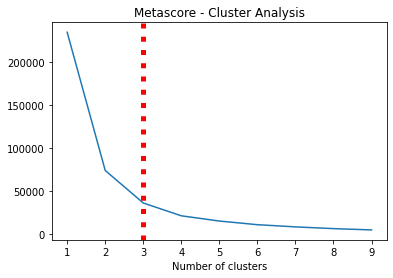

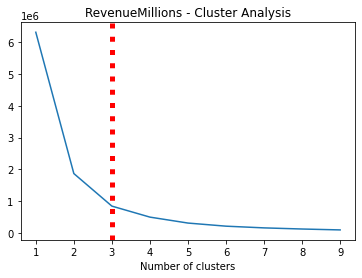

In [ ]:
# REMOÇÃO DE CÉLULAS VAZIAS:
df_imdb = df_imdb_i.dropna()

# VISUALIZAÇÃO INICIAL DE DISTRIBUIÇÃO DE DADOS:
# =~=~=~=~=~=~   Metascore
sns.histplot(df_imdb, x='Metascore',bins=100, color='w')
plt.title('Metascore Distribuição - HISTOGRAMA')
plt.ylabel('Ocorrências')
plt.xlabel('Metascore [0-100]')
plt.show()

ax = sns.boxplot(x=df_imdb["Metascore"].astype(int),orient='v', color='w')
plt.title('Box Plot: Metascore')
plt.show()

# =~=~=~=~=~=~   RevenueMillions
sns.histplot(df_imdb, x='RevenueMillions',bins=100, color='w')
plt.title('RevenueMillions Distribuição - HISTOGRAMA')
plt.ylabel('Ocorrências')
plt.xlabel('RevenueMillions [0-100]')
plt.show()

ax = sns.boxplot(x=df_imdb["RevenueMillions"].astype(int),orient='v', color='w')
plt.title('Box Plot: RevenueMillions')
plt.show()

# =~=~=~=~=~=~   Runtime
sns.histplot(df_imdb, x='Runtime',bins=100, color='w')
plt.title('Runtime Distribuição - HISTOGRAMA')
plt.ylabel('Ocorrências')
plt.xlabel('Runtime [0-100]')
plt.show()

ax = sns.boxplot(x=df_imdb["Runtime"].astype(int),orient='v', color='w')
plt.title('Box Plot: Runtime')
plt.show()

# FILTRO DE VOTOS MÍNIMOS (E REMOÇÃO DE OUTLIERS):
df_imdb = df_imdb[(df_imdb['Votes'] >= 100)]
df_imdb = df_imdb[df_imdb['RevenueMillions'] < df_imdb['RevenueMillions'].astype(float).quantile(0.99)]
df_imdb = df_imdb[df_imdb['Runtime'] < df_imdb['Runtime'].quantile(0.99)]
df_imdb = df_imdb[df_imdb['Runtime'] > df_imdb['Runtime'].quantile(0.01)]

# VISUALIZAÇÃO DE DISTRIBUIÇÃO DE DADOS:
# =~=~=~=~=~=~   Metascore
sns.histplot(df_imdb, x='Metascore',bins=100, color='green')
plt.title('Metascore Distribuição - HISTOGRAMA')
plt.ylabel('Ocorrências')
plt.xlabel('Metascore [0-100]')
plt.show()

ax = sns.boxplot(x=df_imdb["Metascore"].astype(int),orient='v', color='green')
plt.title('Box Plot: Metascore')
plt.show()

# =~=~=~=~=~=~   RevenueMillions
sns.histplot(df_imdb, x='RevenueMillions',bins=100, color='green')
plt.title('RevenueMillions Distribuição - HISTOGRAMA')
plt.ylabel('Ocorrências')
plt.xlabel('RevenueMillions [0-100]')
plt.show()

ax = sns.boxplot(x=df_imdb["RevenueMillions"].astype(int),orient='v', color='green')
plt.title('Box Plot: RevenueMillions')
plt.show()

# =~=~=~=~=~=~   Runtime
sns.histplot(df_imdb, x='Runtime',bins=100, color='green')
plt.title('Runtime Distribuição - HISTOGRAMA')
plt.ylabel('Ocorrências')
plt.xlabel('Runtime [0-100]')
plt.show()

ax = sns.boxplot(x=df_imdb["Runtime"].astype(int),orient='v', color='green')
plt.title('Box Plot: Runtime')
plt.show()

# CLUSTERIZAÇÃO DE METASCORE (ESTUDO DE NÚMERO DE CLUSTERS):
# =~=~=~=~=~=~=~=~=~ Metascore
sse = {}
df_metascore = df_imdb[['Metascore']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_metascore)
    df_metascore.iloc.clusters = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.title('Metascore - Cluster Analysis')
plt.axvline(x=3,color='red',linestyle='dotted', linewidth=5)
plt.show

# =~=~=~=~=~=~=~=~=~ RevenueMillions
sse = {}
df_RevenueMillions = df_imdb[['RevenueMillions']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_RevenueMillions)
    df_RevenueMillions.iloc.clusters = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.title('RevenueMillions - Cluster Analysis')
plt.axvline(x=3,color='red',linestyle='dotted', linewidth=5)
plt.show

# CLUSTERIZAÇÃO:
# =~=~=~=~=~=~=~  METASCORE
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_imdb[['Metascore']])
df_imdb['MetascoreCluster'] = kmeans.predict(df_imdb[['Metascore']])

# =~=~=~=~=~=~=~  RevenueMillions
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_imdb[['RevenueMillions']])
df_imdb['RevenueMillionsCluster'] = kmeans.predict(df_imdb[['RevenueMillions']])

def order_cluster(cluster_field_name, target_field_name,df,ascending):
    """ Função para ordenar as labels de clusters de acordo com sua relevância """
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

# ordenar cluster 
df_imdb = order_cluster('MetascoreCluster', 'Metascore', df_imdb, True)
df_imdb = order_cluster('RevenueMillionsCluster', 'RevenueMillions', df_imdb, True)

# dando nomes aos clusters
df_imdb['Metascore-level'] = 'Low-Metascore'
df_imdb['Revenue-level'] = 'Low-Revenue'
df_imdb.loc[df_imdb['MetascoreCluster']== 1,'Metascore-level'] = 'Mid-Metascore' 
df_imdb.loc[df_imdb['MetascoreCluster']== 2,'Metascore-level'] = 'High-Metascore' 
df_imdb.loc[df_imdb['RevenueMillionsCluster'] == 1 ,'Revenue-level'] = 'Mid-Revenue' 
df_imdb.loc[df_imdb['RevenueMillionsCluster'] == 2 ,'Revenue-level'] = 'High-Revenue' 

display(df_imdb)

# TOP 10 DIRETORES(AS) MAIS PRESENTES EM CADA CLUSTER:

# filtrando diretores por cluster
data = {'High-Revenue':   list(df_imdb[(df_imdb['Revenue-level']   == 'High-Revenue')]['Director']),
        'Mid-Revenue':    list(df_imdb[(df_imdb['Revenue-level']   == 'Mid-Revenue')]['Director']),
        'Low-Revenue':    list(df_imdb[(df_imdb['Revenue-level']   == 'Low-Revenue')]['Director']),
        'High-Metascore': list(df_imdb[(df_imdb['Metascore-level'] == 'High-Metascore')]['Director']),
        'Mid-Metascore':  list(df_imdb[(df_imdb['Metascore-level'] == 'Mid-Metascore')]['Director']),
        'Low-Metascore':  list(df_imdb[(df_imdb['Metascore-level'] == 'Low-Metascore')]['Director'])
        }

df_dir = pd.DataFrame.from_dict(data, orient='index')
df_dir = df_dir.transpose()
display(df_dir)

 # selecionando top 10 mais presentes de cada cluster
top10 = pd.DataFrame({'Top Directors':range(1,11)})
for col in df_dir.columns:
  top10[col] = pd.DataFrame(df_dir[col].value_counts().sort_values(ascending=False).head(10)).index

display(top10)

# TOP 10 GENEROS E COMBINAÇÕES DE GÊNERO MAIS PRESENTES EM CADA CLUSTER:

def flatten(list):
    """ Transforma lista de listas em uma lista plana """
    return [item for sublist in list for item in sublist]

# filtrando generos por cluster
data = {'High-Revenue':   flatten(list(df_imdb[(df_imdb['Revenue-level']   == 'High-Revenue')]['Genre'].str.split(','))),
        'Mid-Revenue':    flatten(list(df_imdb[(df_imdb['Revenue-level']   == 'Mid-Revenue')]['Genre'].str.split(','))),
        'Low-Revenue':    flatten(list(df_imdb[(df_imdb['Revenue-level']   == 'Low-Revenue')]['Genre'].str.split(','))),
        'High-Metascore': flatten(list(df_imdb[(df_imdb['Metascore-level'] == 'High-Metascore')]['Genre'].str.split(','))),
        'Mid-Metascore':  flatten(list(df_imdb[(df_imdb['Metascore-level'] == 'Mid-Metascore')]['Genre'].str.split(','))),
        'Low-Metascore':  flatten(list(df_imdb[(df_imdb['Metascore-level'] == 'Low-Metascore')]['Genre'].str.split(',')))
        }

df_gen = pd.DataFrame.from_dict(data, orient='index')
df_gen = df_gen.transpose()

 # selecionando top 10 mais presentes de cada cluster
top10 = pd.DataFrame({'Top Genres':range(1,11)})
for col in df_gen.columns:
  top10[col] = pd.DataFrame(df_gen[col].value_counts().sort_values(ascending=False).head(10)).index

display(top10)

# filtrando combinações generos por cluster
data = {'High-Revenue':   (list(df_imdb[(df_imdb['Revenue-level']   == 'High-Revenue')]['Genre'])),
        'Mid-Revenue':    (list(df_imdb[(df_imdb['Revenue-level']   == 'Mid-Revenue')]['Genre'])),
        'Low-Revenue':    (list(df_imdb[(df_imdb['Revenue-level']   == 'Low-Revenue')]['Genre'])),
        'High-Metascore': (list(df_imdb[(df_imdb['Metascore-level'] == 'High-Metascore')]['Genre'])),
        'Mid-Metascore':  (list(df_imdb[(df_imdb['Metascore-level'] == 'Mid-Metascore')]['Genre'])),
        'Low-Metascore':  (list(df_imdb[(df_imdb['Metascore-level'] == 'Low-Metascore')]['Genre']))
        }

df_gen = pd.DataFrame.from_dict(data, orient='index')
df_gen = df_gen.transpose()

 # selecionando top 10 mais presentes de cada cluster
top10 = pd.DataFrame({'Top Genres Combination':range(1,11)})
for col in df_gen.columns:
  top10[col] = pd.DataFrame(df_gen[col].value_counts().sort_values(ascending=False).head(10)).index

display(top10)

# TOP 10 ATORES/ATRIZES MAIS PRESENTES EM CADA CLUSTER:

def flatten(list):
    return [item for sublist in list for item in sublist]

# filtrando atores/atrizes por cluster
data = {'High-Revenue':   flatten(list(df_imdb[(df_imdb['Revenue-level']   == 'High-Revenue')]['Actors'].str.split(','))),
        'Mid-Revenue':    flatten(list(df_imdb[(df_imdb['Revenue-level']   == 'Mid-Revenue')]['Actors'].str.split(','))),
        'Low-Revenue':    flatten(list(df_imdb[(df_imdb['Revenue-level']   == 'Low-Revenue')]['Actors'].str.split(','))),
        'High-Metascore': flatten(list(df_imdb[(df_imdb['Metascore-level'] == 'High-Metascore')]['Actors'].str.split(','))),
        'Mid-Metascore':  flatten(list(df_imdb[(df_imdb['Metascore-level'] == 'Mid-Metascore')]['Actors'].str.split(','))),
        'Low-Metascore':  flatten(list(df_imdb[(df_imdb['Metascore-level'] == 'Low-Metascore')]['Actors'].str.split(',')))
        }

df_act = pd.DataFrame.from_dict(data, orient='index')
df_act = df_act.transpose()

 # selecionando top 10 mais presentes de cada cluster
top10 = pd.DataFrame({'Top Actor':range(1,11)})
for col in df_act.columns:
  top10[col] = pd.DataFrame(df_act[col].value_counts().sort_values(ascending=False).head(10)).index

display(top10)


# MÉTRICAS DE RUNTIME E RATING EM CADA CLUSTER:

def agg2(df):
  """Agrega colunas de um dataframe de acordo com o dicionário 'dict_agg' """
  dict_agg = {
      'Mean_Revenue': df.RevenueMillions.mean(),
      'Median_Revenue': df.RevenueMillions.median(),
      'Mean_Runtime': df.Runtime.mean(),
      'Median_Runtime': df.Runtime.median(),
      'Mean_Rating': df.Rating.mean(),
      'Median_Rating': df.Rating.median(),
      'Mean_Metascore': df.Metascore.mean(),
      'Median_Metascore': df.Metascore.median()
  }
  return pd.Series(dict_agg)

 
df_imdb_agg = df_imdb.groupby(['Metascore-level', 'Revenue-level'], as_index=False).apply(agg2)
display(df_imdb_agg)

